In [1]:
pip install scikit-learn==1.1.3

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

C:\Users\sanja\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California

In [3]:
data = pd.DataFrame(boston.data, columns=boston.feature_names)

In [4]:
print(data.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB
None


In [8]:
print(data.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [9]:
print(data.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64


In [10]:
duplicate_rows = data[data.duplicated()]
print(f'Number of duplicate rows: {duplicate_rows.shape[0]}')

Number of duplicate rows: 0


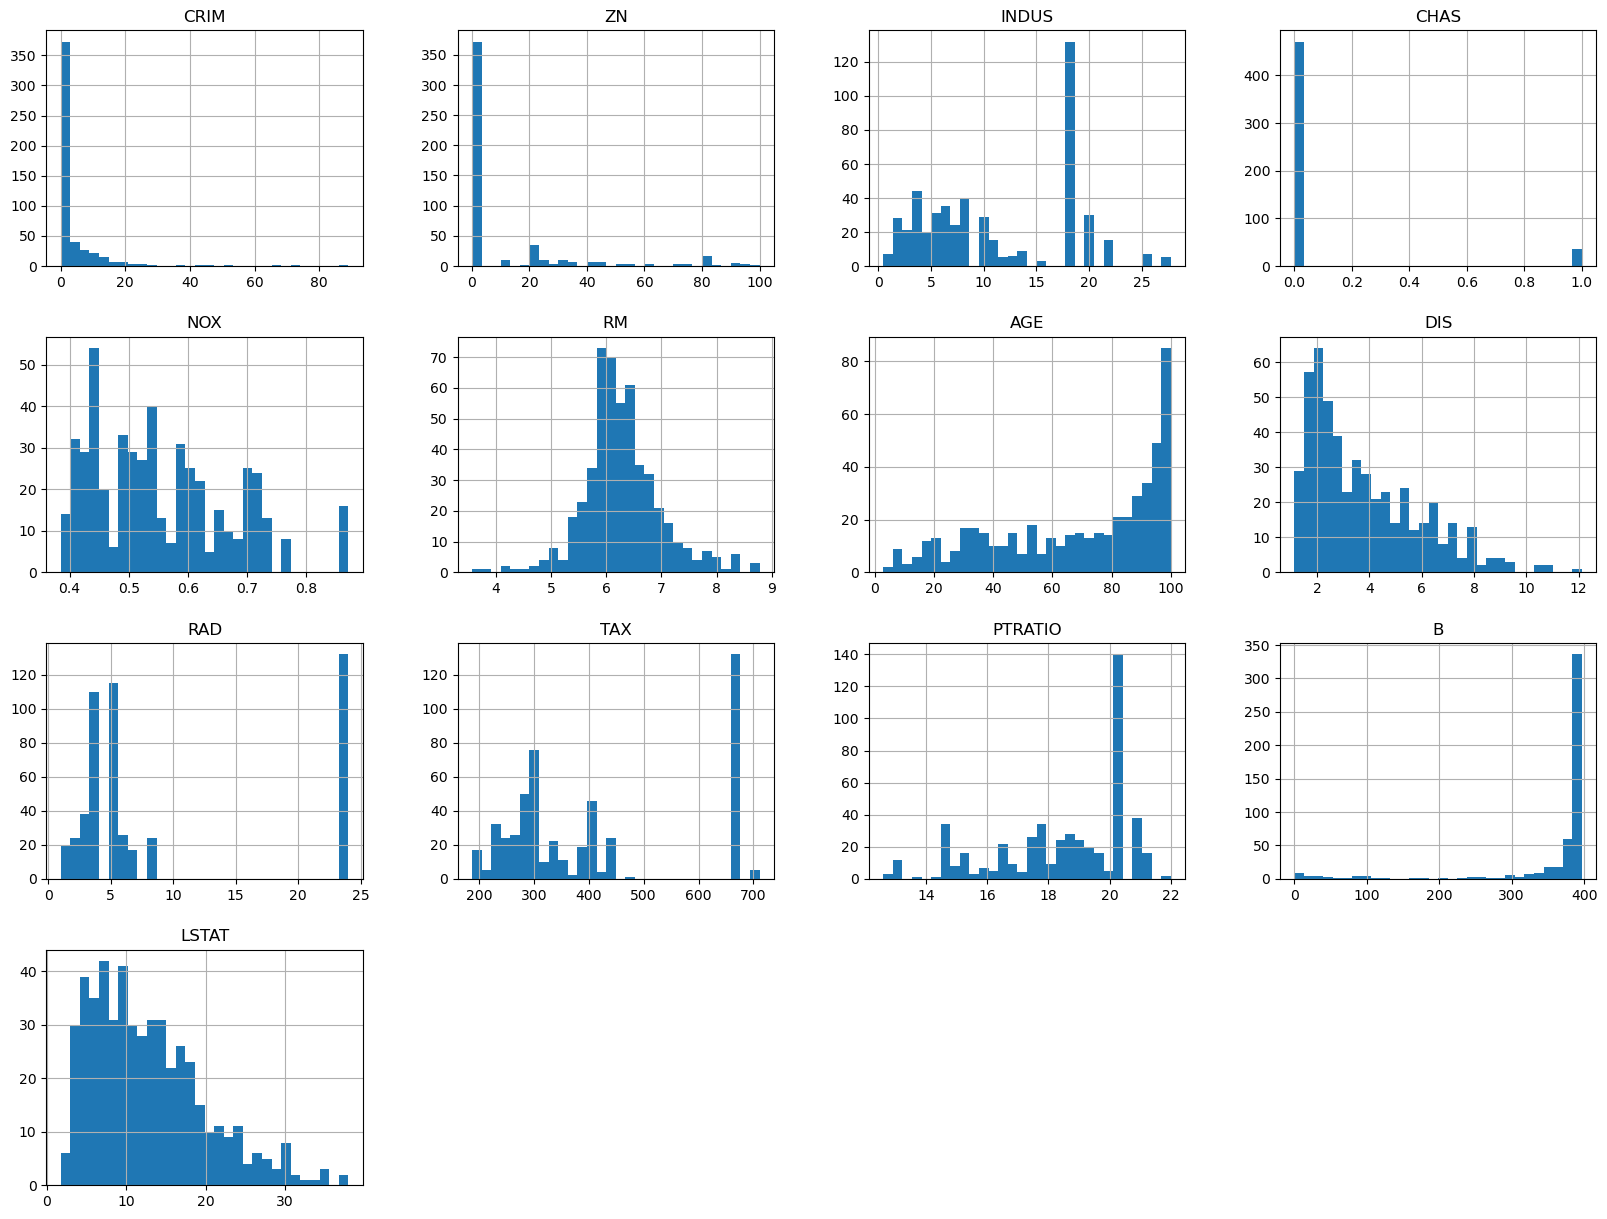

In [11]:
import matplotlib.pyplot as plt

# Histograms of all features
data.hist(bins=30, figsize=(20, 15))
plt.show()

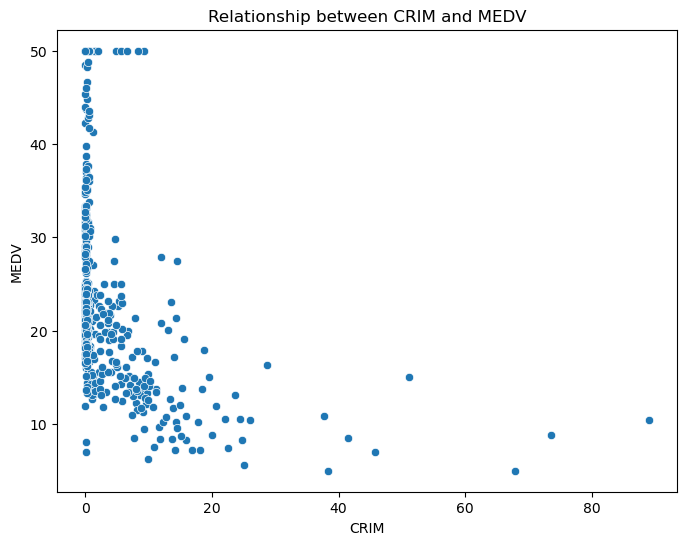

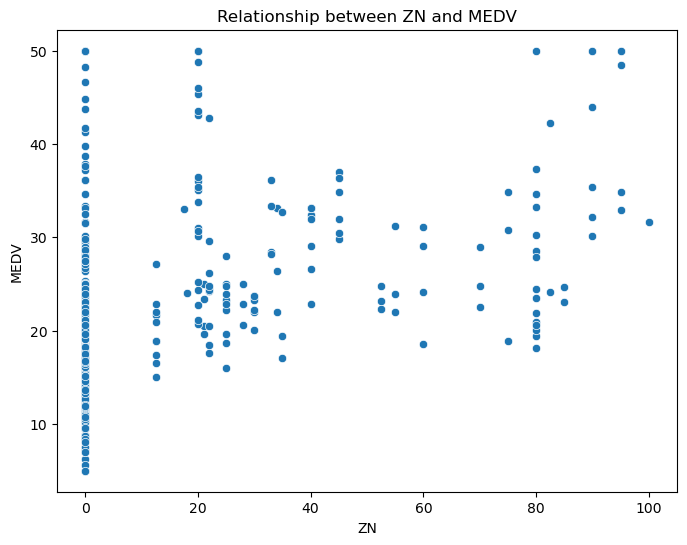

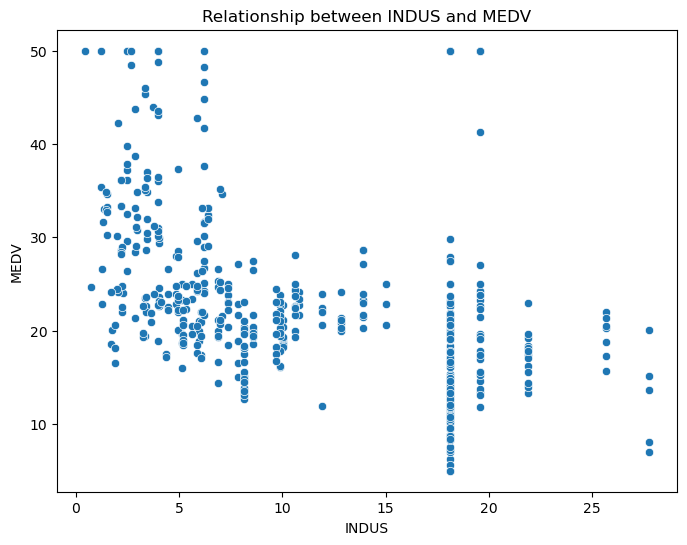

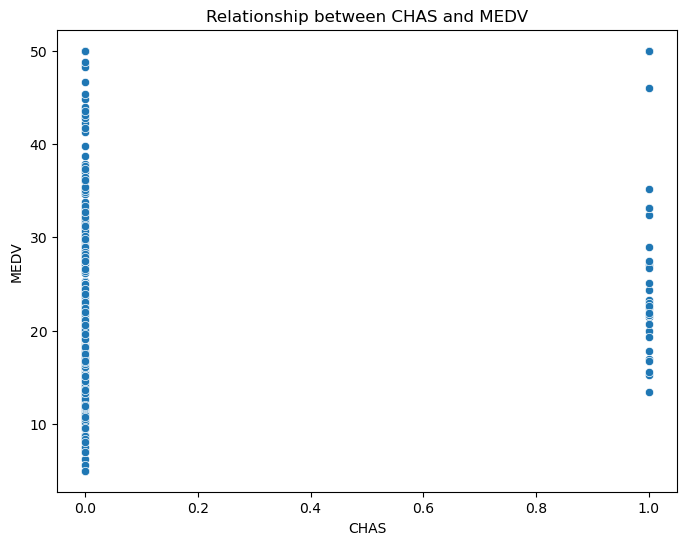

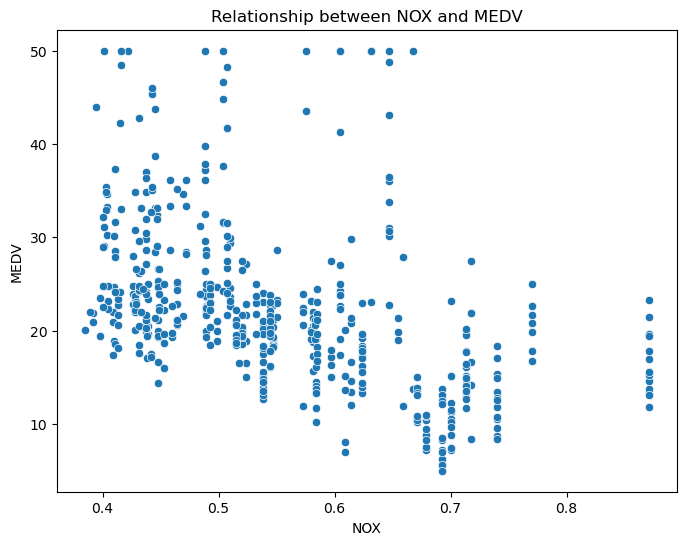

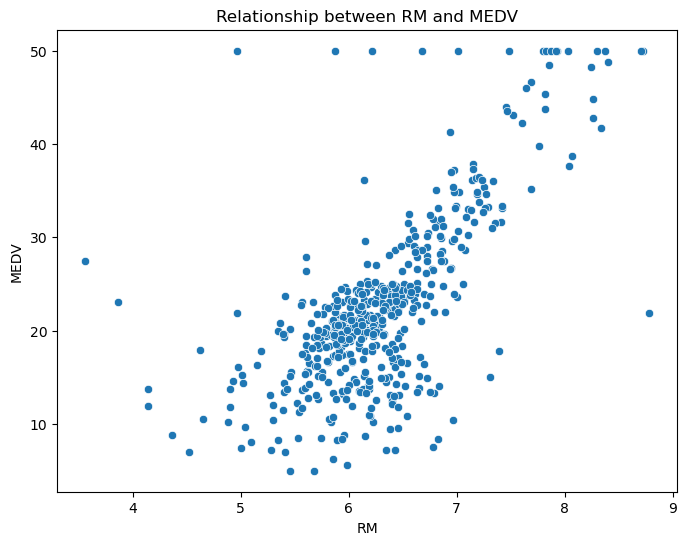

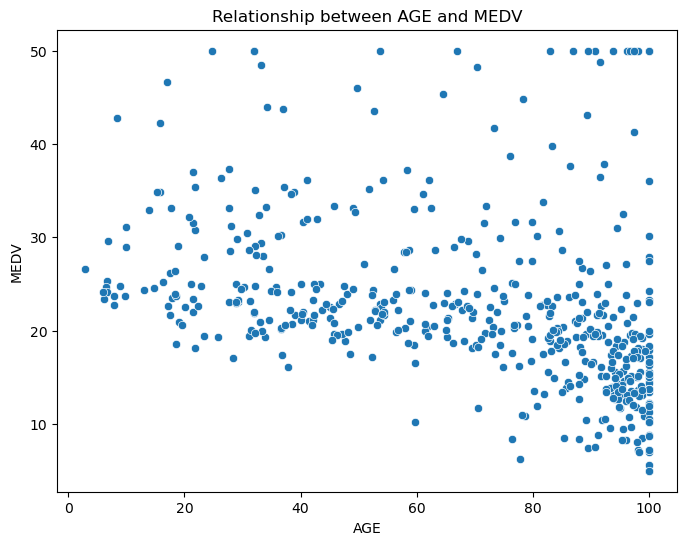

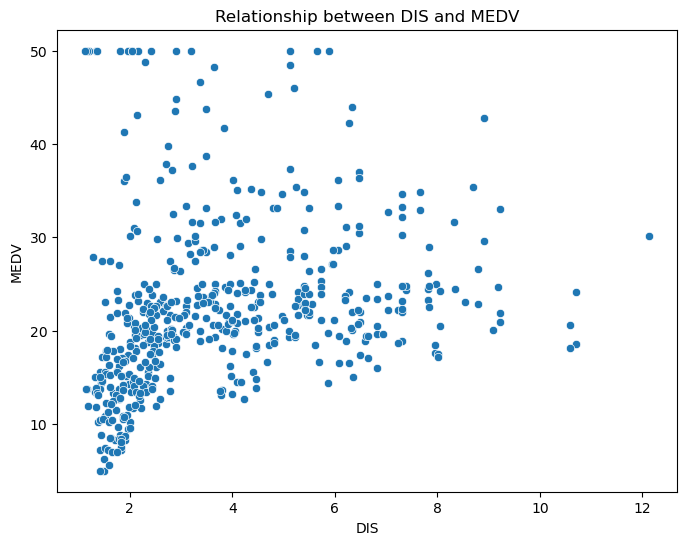

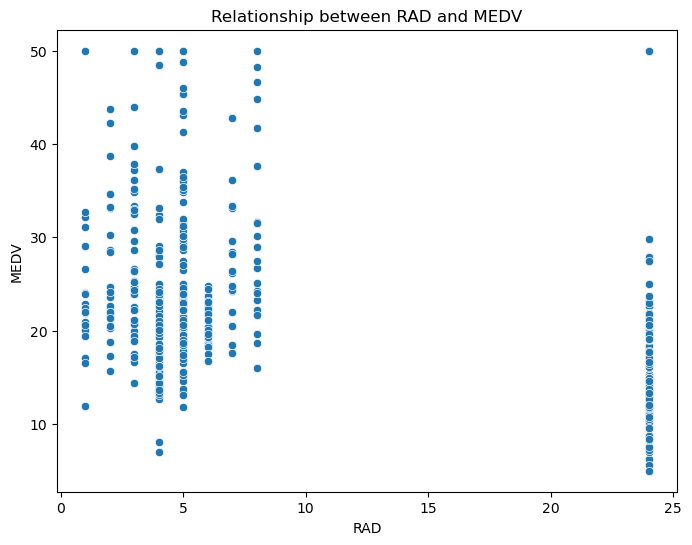

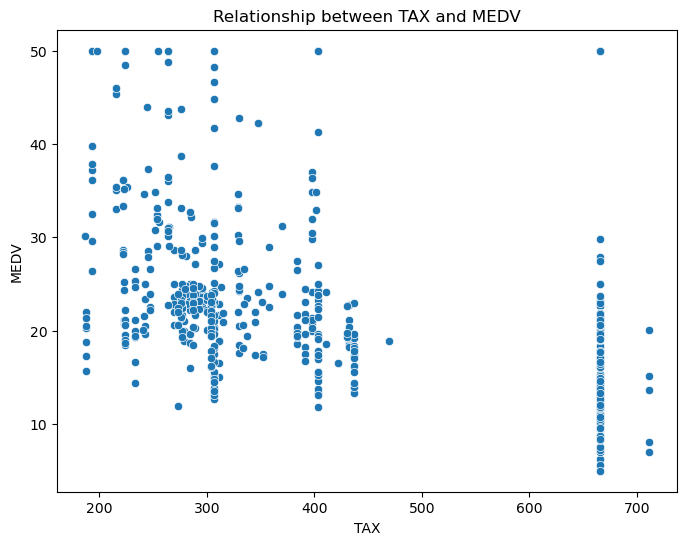

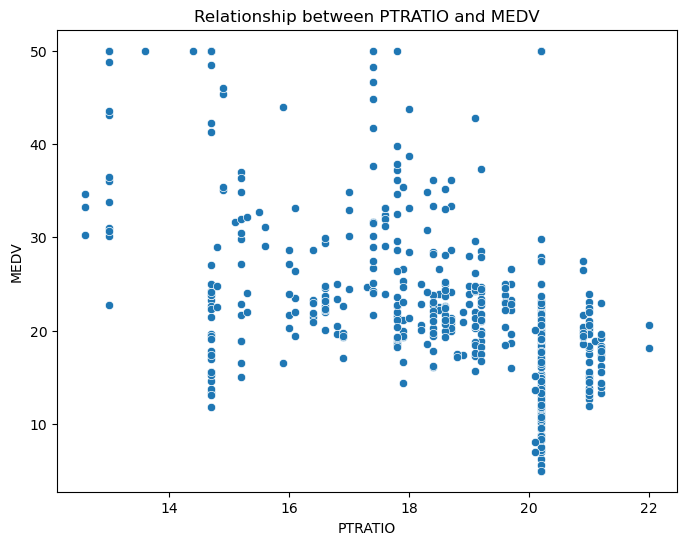

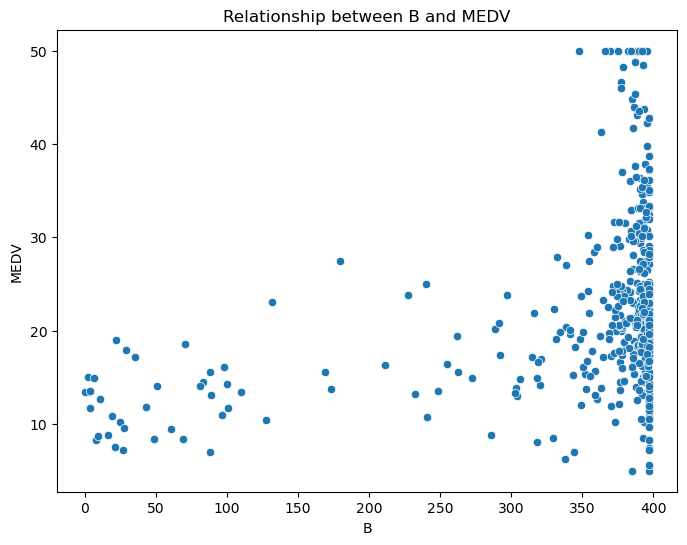

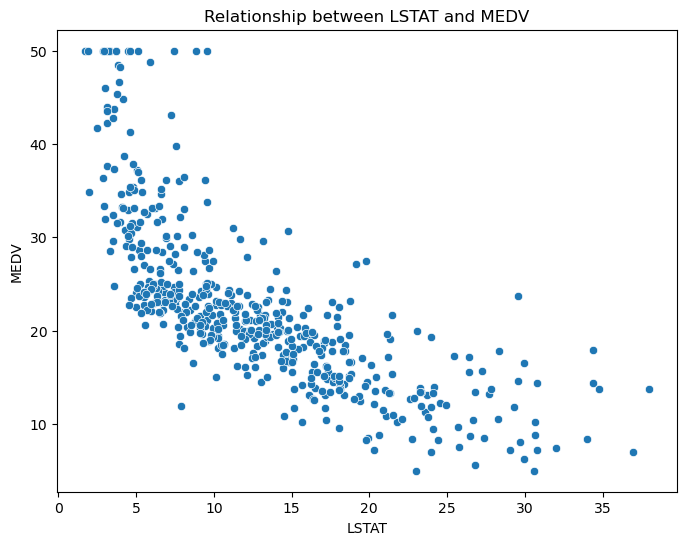

In [12]:
# Scatter plots
import seaborn as sns
data['MEDV'] = boston.target
# Plot relationships between each feature and the target variable
for column in data.columns[:-1]:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=column, y='MEDV')
    plt.title(f'Relationship between {column} and MEDV')
    plt.show()

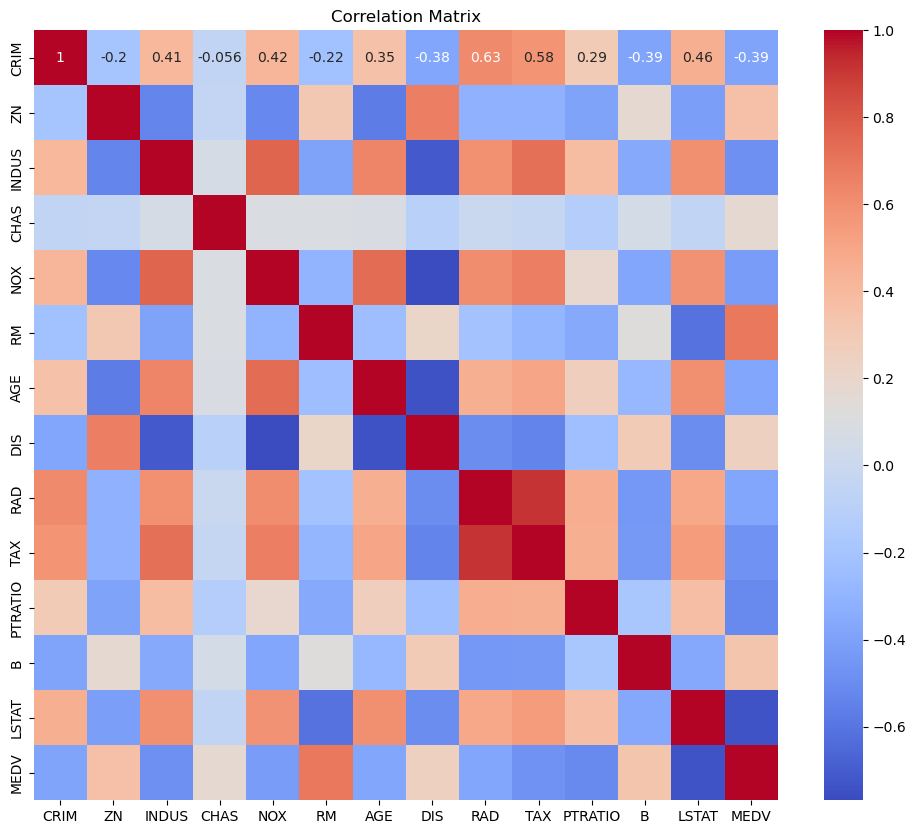

In [13]:
# Correlation matrix
corr_matrix = data.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

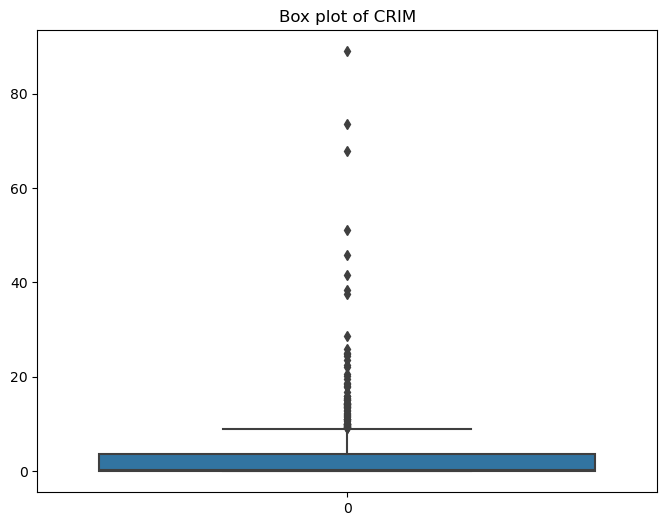

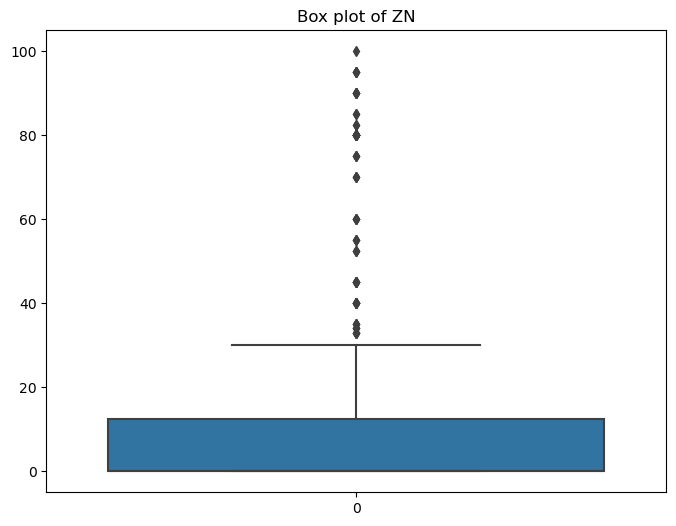

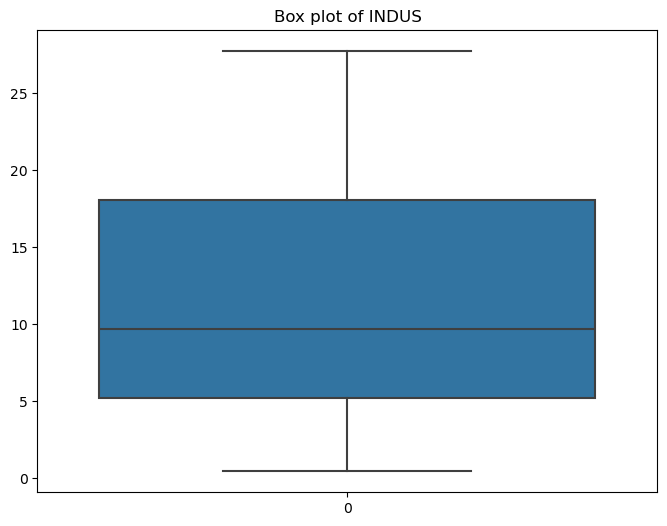

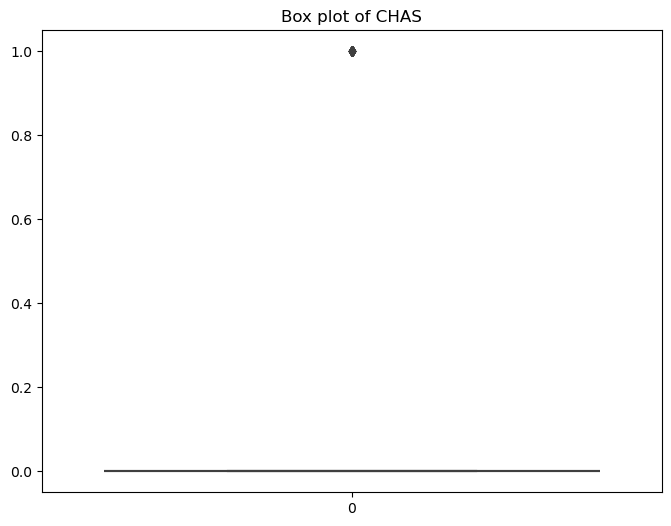

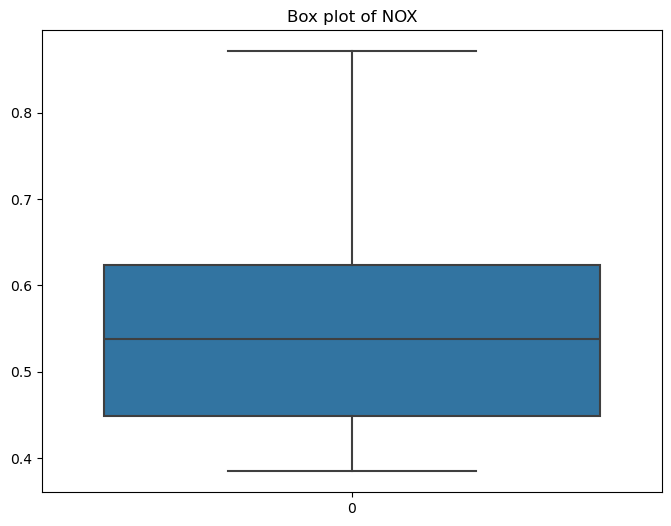

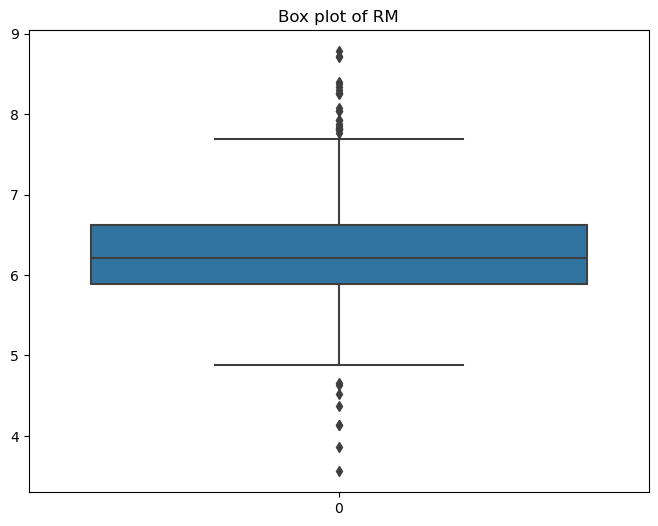

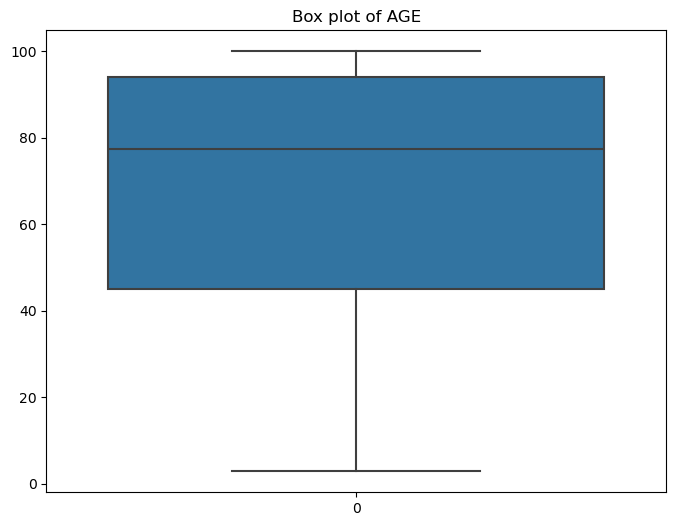

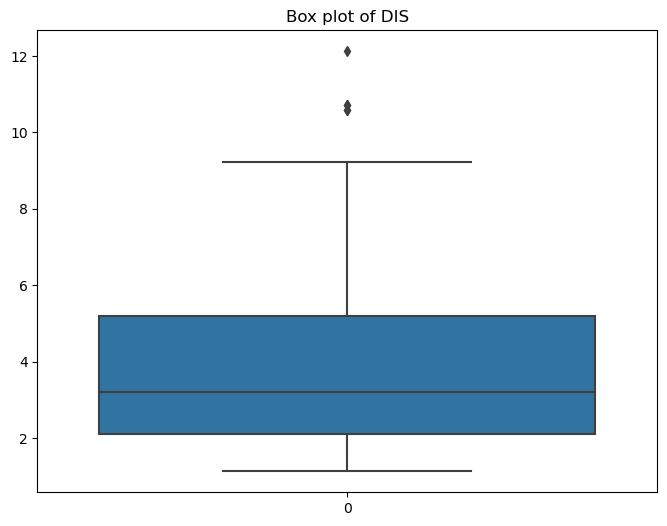

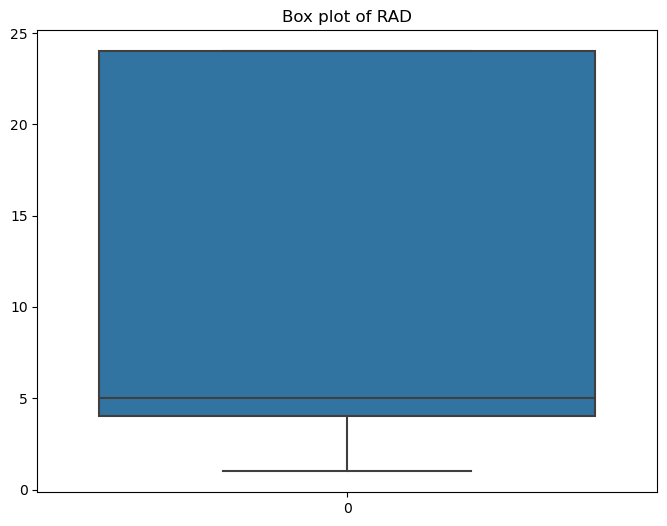

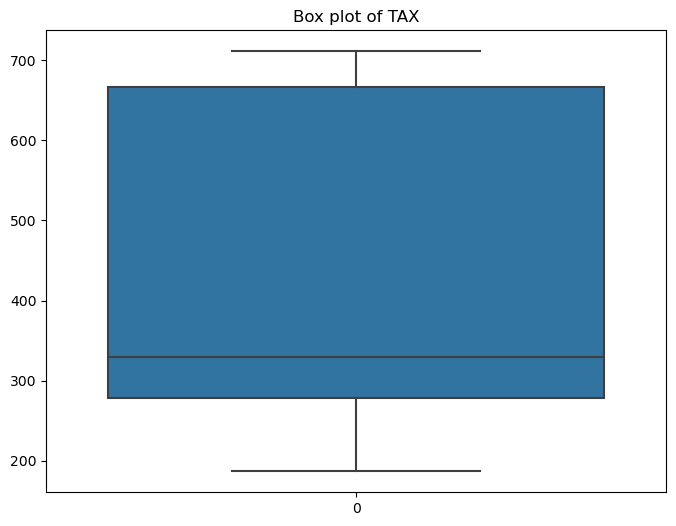

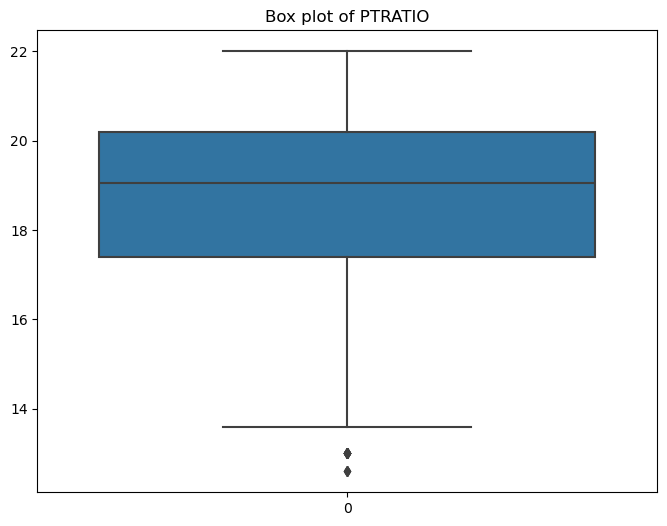

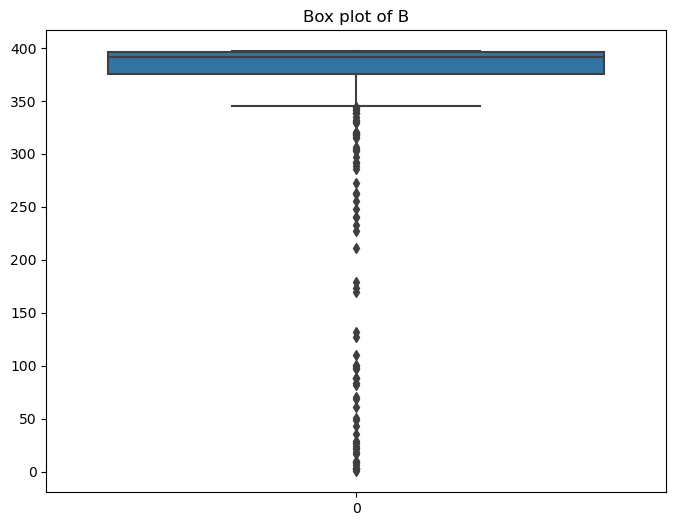

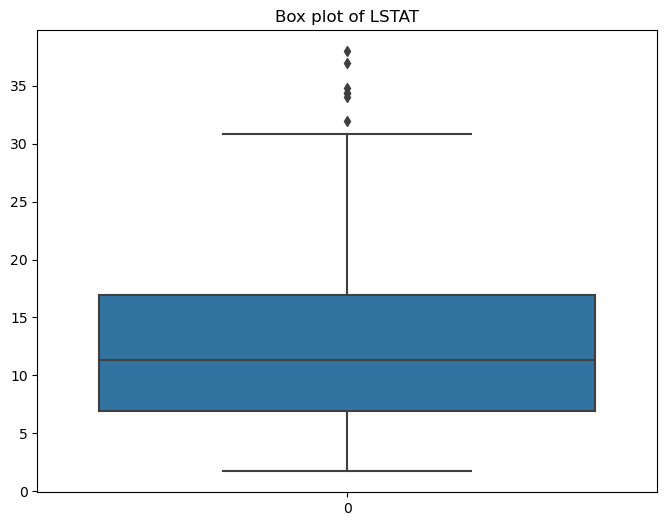

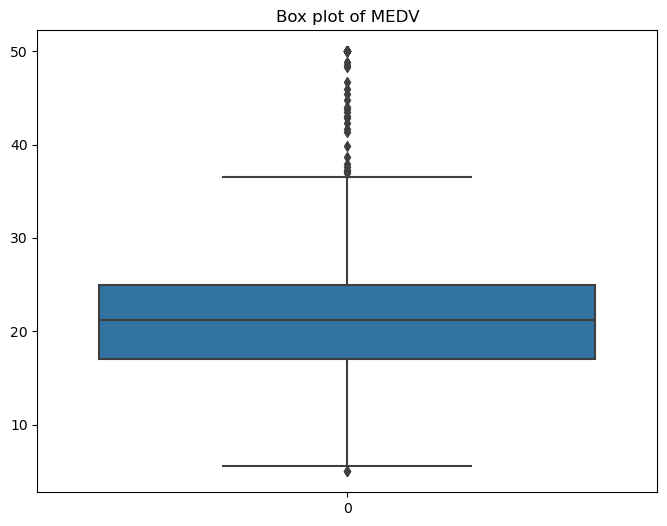

In [14]:
# Box plots
for column in data.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data[column])
    plt.title(f'Box plot of {column}')
    plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

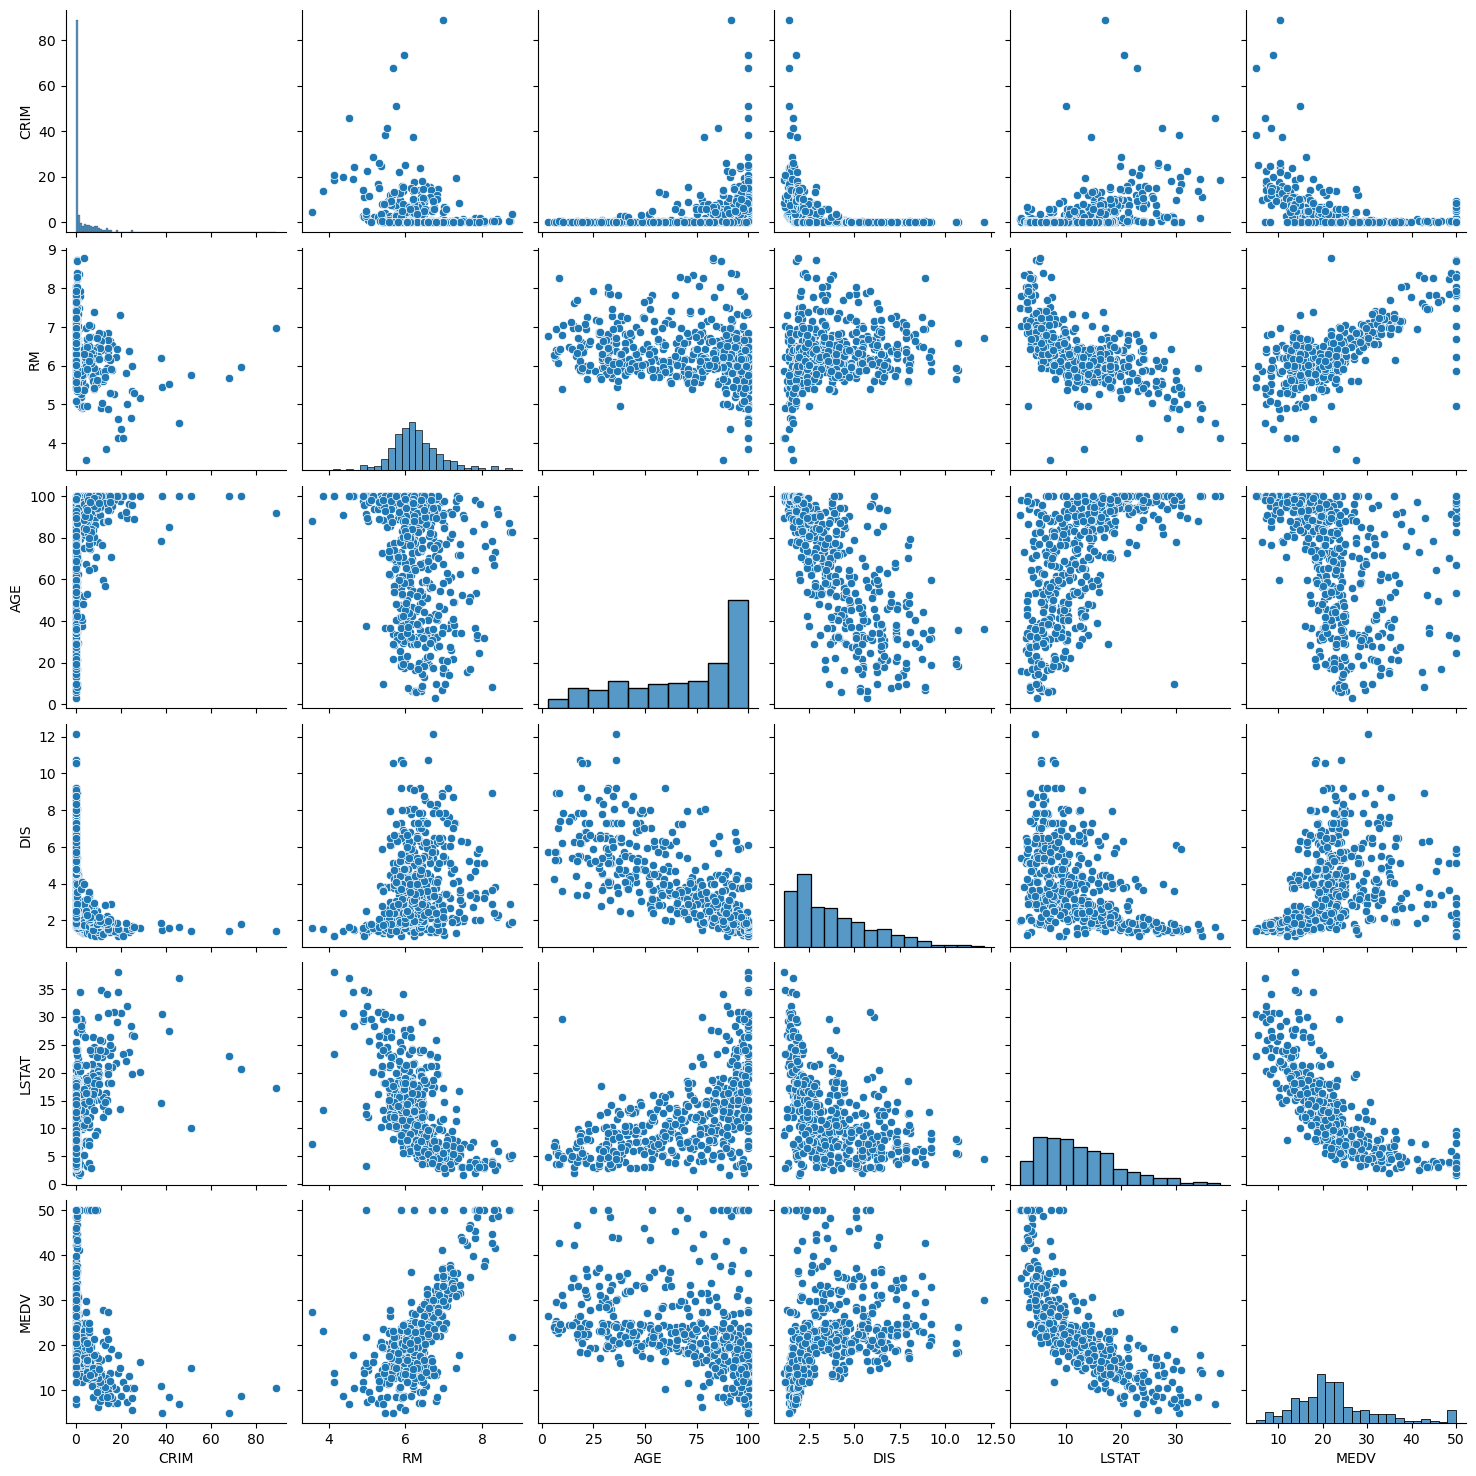

In [15]:
# Pair plot
sns.pairplot(data[['CRIM', 'RM', 'AGE', 'DIS', 'LSTAT', 'MEDV']])
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


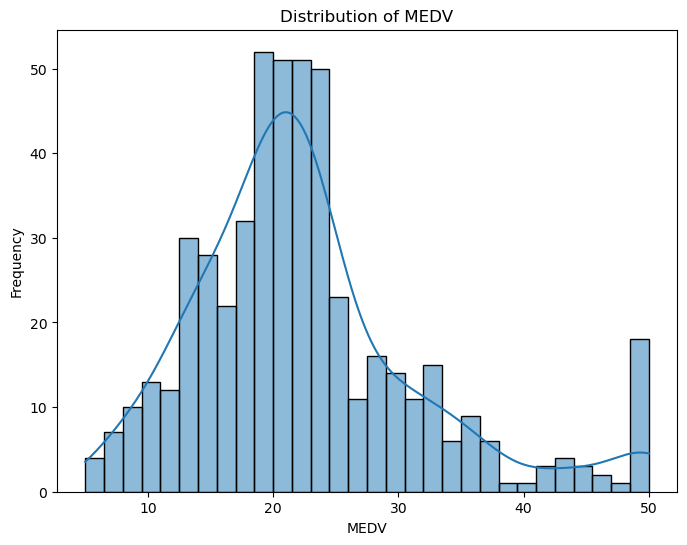

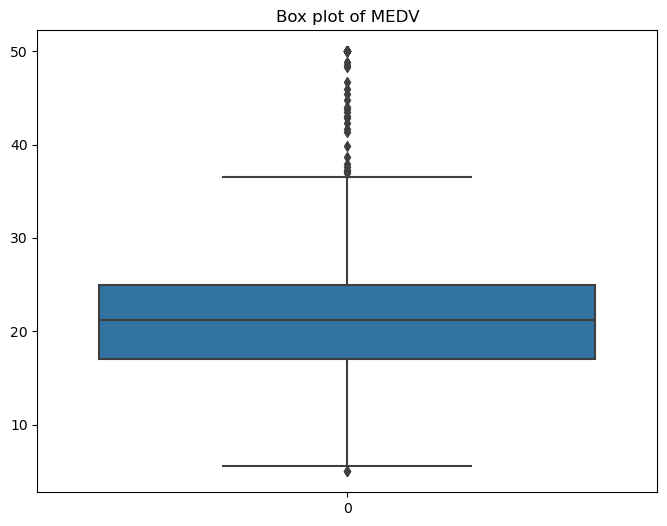

In [16]:
# Histogram of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(data['MEDV'], bins=30, kde=True)
plt.title('Distribution of MEDV')
plt.xlabel('MEDV')
plt.ylabel('Frequency')
plt.show()

# Box plot of the target variable
plt.figure(figsize=(8, 6))
sns.boxplot(data['MEDV'])
plt.title('Box plot of MEDV')
plt.show()

In [17]:
# Perform one-hot encoding on the 'CHAS' column
data_encoded = pd.get_dummies(data, columns=['CHAS'], drop_first=True)

In [18]:
print(data_encoded.head())

      CRIM    ZN  INDUS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31  0.538  6.575  65.2  4.0900  1.0  296.0     15.3   
1  0.02731   0.0   7.07  0.469  6.421  78.9  4.9671  2.0  242.0     17.8   
2  0.02729   0.0   7.07  0.469  7.185  61.1  4.9671  2.0  242.0     17.8   
3  0.03237   0.0   2.18  0.458  6.998  45.8  6.0622  3.0  222.0     18.7   
4  0.06905   0.0   2.18  0.458  7.147  54.2  6.0622  3.0  222.0     18.7   

        B  LSTAT  MEDV  CHAS_1.0  
0  396.90   4.98  24.0     False  
1  396.90   9.14  21.6     False  
2  392.83   4.03  34.7     False  
3  394.63   2.94  33.4     False  
4  396.90   5.33  36.2     False  


In [19]:
import numpy as np

# Apply log transformation to skewed features
skewed_features = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
data_transformed = data.copy()
data_transformed[skewed_features] = data[skewed_features].apply(lambda x: np.log(x + 1))


In [20]:
# Log transformation of the target variable
data_transformed['MEDV'] = np.log(data['MEDV'])


In [21]:
from sklearn.preprocessing import MinMaxScaler

X = data.drop('MEDV', axis=1)
y = data['MEDV']

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for readability
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display the first few rows of the scaled features
print(X_scaled_df.head())


       CRIM    ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0  0.000000  0.18  0.067815   0.0  0.314815  0.577505  0.641607  0.269203   
1  0.000236  0.00  0.242302   0.0  0.172840  0.547998  0.782698  0.348962   
2  0.000236  0.00  0.242302   0.0  0.172840  0.694386  0.599382  0.348962   
3  0.000293  0.00  0.063050   0.0  0.150206  0.658555  0.441813  0.448545   
4  0.000705  0.00  0.063050   0.0  0.150206  0.687105  0.528321  0.448545   

        RAD       TAX   PTRATIO         B     LSTAT  
0  0.000000  0.208015  0.287234  1.000000  0.089680  
1  0.043478  0.104962  0.553191  1.000000  0.204470  
2  0.043478  0.104962  0.553191  0.989737  0.063466  
3  0.086957  0.066794  0.648936  0.994276  0.033389  
4  0.086957  0.066794  0.648936  1.000000  0.099338  


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Split data into training and testing sets
X = data.drop('MEDV', axis=1)
y = data['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression R-squared: {r2_lr:.2f}")
print(f"Linear Regression Mean Squared Error: {mse_lr:.2f}")

Linear Regression R-squared: 0.67
Linear Regression Mean Squared Error: 24.29


In [26]:
# Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest R-squared: {r2_rf:.2f}")
print(f"Random Forest Mean Squared Error: {mse_rf:.2f}")

Random Forest R-squared: 0.89
Random Forest Mean Squared Error: 7.90


In [27]:
print("Model Performance Comparison:")
print(f"Linear Regression R-squared: {r2_lr:.2f}, MSE: {mse_lr:.2f}")
print(f"Random Forest R-squared: {r2_rf:.2f}, MSE: {mse_rf:.2f}")

Model Performance Comparison:
Linear Regression R-squared: 0.67, MSE: 24.29
Random Forest R-squared: 0.89, MSE: 7.90


In [28]:
data['LSTAT_SQ'] = data['LSTAT'] ** 2
data['RM_SQ'] = data['RM'] ** 2

# Re-scaling after adding new features
data_scaled = scaler.fit_transform(data.drop('MEDV', axis=1))
data_scaled = pd.DataFrame(data_scaled, columns=data.columns[:-1])
data_scaled['MEDV'] = data['MEDV'].reset_index(drop=True)

In [32]:
from sklearn.ensemble import GradientBoostingRegressor
# Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor(n_estimators=200, max_depth=4, learning_rate=0.1, random_state=42)
gbr_model.fit(X_train, y_train)
# Predict on the test set
y_pred_gbr = gbr_model.predict(X_test)

# Evaluate model performance
r2_gbr = r2_score(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
print(f"Gradient Boosting R-squared: {r2_gbr:.2f}")
print(f"Gradient Boosting Mean Squared Error: {mse_gbr:.2f}")

Gradient Boosting R-squared: 0.92
Gradient Boosting Mean Squared Error: 5.99


In [31]:
from sklearn.model_selection import cross_val_score
# Cross-validation for more reliable evaluation
cv_scores = cross_val_score(gbr_model, X, y, cv=5, scoring='r2')
print(f"Cross-validated R-squared scores: {cv_scores}")
print(f"Mean Cross-validated R-squared: {cv_scores.mean():.2f}")

Cross-validated R-squared scores: [0.78271874 0.81404836 0.69301162 0.57739022 0.33063691]
Mean Cross-validated R-squared: 0.64
